<a href="https://colab.research.google.com/github/bangsudo/bangsudo.github.io/blob/master/capsule2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib
import time
from multiprocessing import Pool
from functools import partial
import matplotlib.gridspec as gridspec

## This is a simple code to simulate replication in quantum capsules.

## There are likely some numpy libraries I can use to make this much faster. I haven't looked for them yet.

The function defined above can be called with the number of processors (2 on google colab), the initial population of the capsule, the number of days to simulate, and the number of simulated capsules.

In [0]:
def quantum_cap_single(caps, pop=[20]*20, rate=0.015):
  replication = rate
  for i in range(caps):
      if pop[i] < 100:
        newpop=0
        for n in range(pop[i]):
          if random.uniform(0, 1) < replication:
            newpop=newpop+1
        pop[i]=pop[i]+newpop
        if pop[i] > 100:
          pop[i] = 100
  return(pop)

def plot_hurricane(nprocs=2,init_pop=10,days=100,samples=10,timing=False, rate=0.015):
  #ignore nprocs for now
  start_time = time.time()
  p = Pool(nprocs)
  population = init_pop
  samples_per_proc = samples//nprocs
  x = []
  y = []
  histogram = [0]*days
  pop=[init_pop]*samples
  for i in range(days):
    total_items=0
    newpop=[]
    x.extend([i]*samples)
    newpop = quantum_cap_single(samples, pop=pop, rate=rate)
    total_items=total_items+sum(newpop)
    y.extend(newpop)
    histogram[i]=total_items//samples
    pop=newpop
  
  stop_time = time.time()
  delta_time = stop_time - start_time
  if timing:
    print("seconds elapsed: " + str(delta_time))
  
  t = list(range(days))
  plt.rcParams["figure.figsize"] = (8,8)

  psize=10
  axs = [0]*2
  fig = plt.figure()
  gs1 = gridspec.GridSpec(2, 1)
  axs[0] = fig.add_subplot(gs1[0])
  axs[1] = fig.add_subplot(gs1[1])

  axs[0].plot(t, histogram)
  H = axs[1].hist2d(x,y, bins=[np.linspace(0,days,days),np.linspace(0,100,100)], norm=matplotlib.colors.LogNorm())
  axs[1].set_xlabel('days')
  axs[1].set_ylabel('items in quantum capsule')
  axs[0].set_ylabel('average items in capsule')
  axs[0].set_xlim([0,days])
  axs[0].get_xaxis().set_visible(False)
  axs[0].axhline(y=95, xmin=0, xmax=days, color='red')
  fig.tight_layout()
  plt.show()

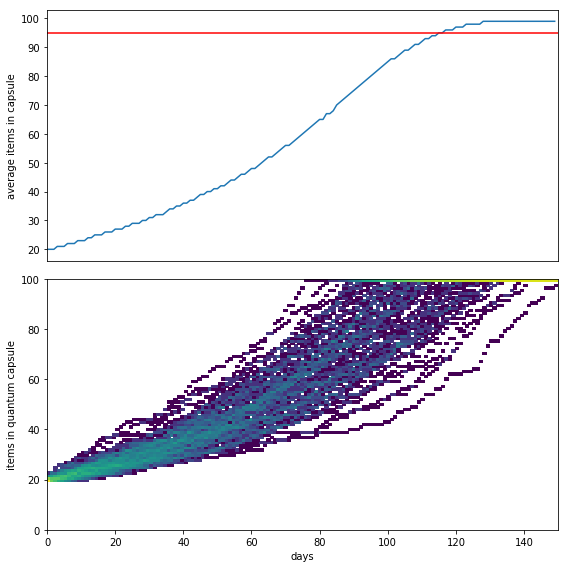

In [3]:
plot_hurricane(init_pop=20,days=150,samples=100,rate=0.015)

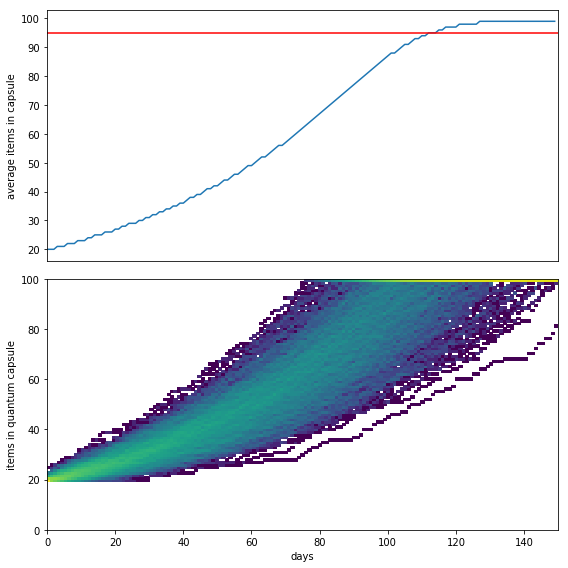

In [6]:
plot_hurricane(init_pop=20,days=150,samples=800,rate=0.015)

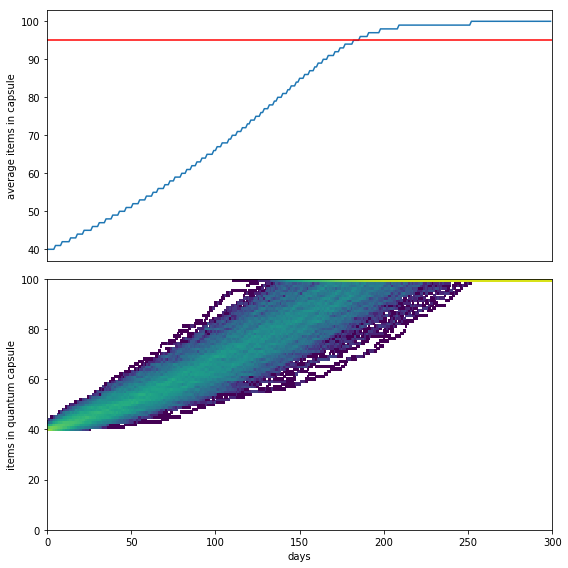

In [8]:
plot_hurricane(init_pop=40,days=300,samples=500,rate=0.005)